In [42]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

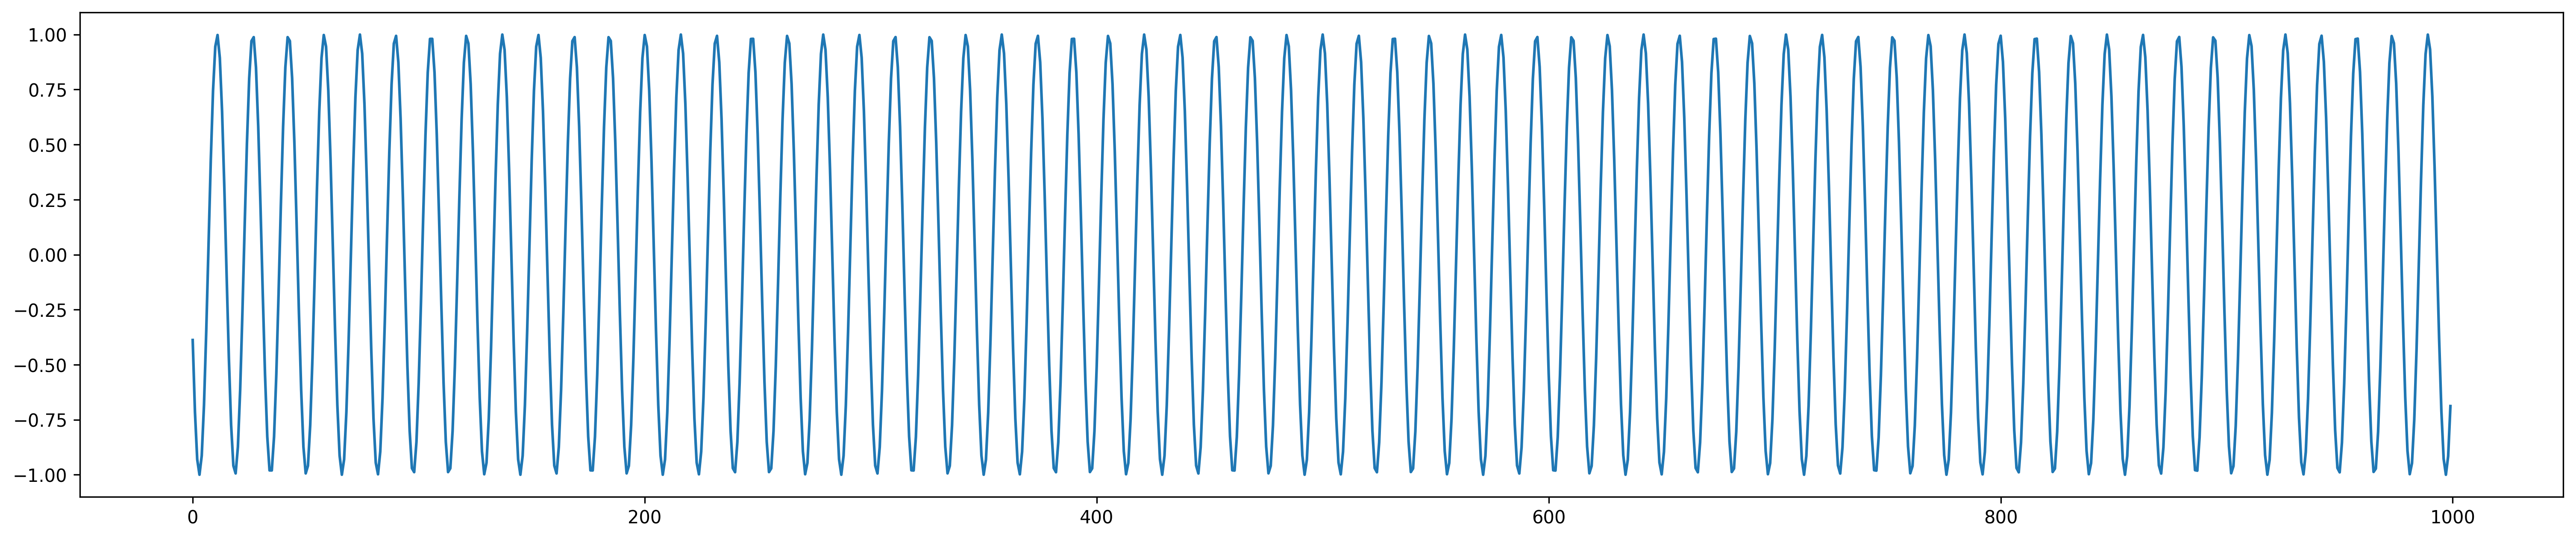

In [43]:
random.seed(100)
plt.figure(figsize=(25
                    ,5),dpi=300)
seq = np.sin(np.arange(1,1001)*random.randint(1,400))
plt.plot(range(1000),seq)

In [44]:
x = seq[1:801]
y = seq[800:1000]

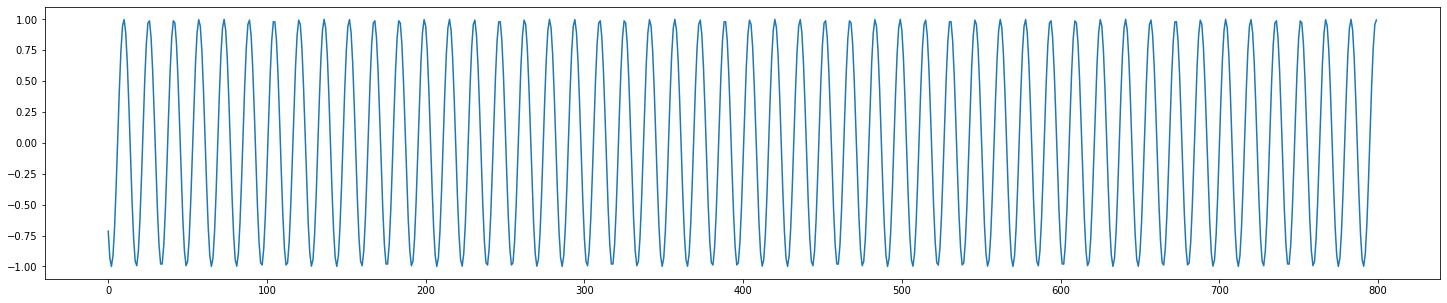

In [45]:
plt.figure(figsize=(25,5))
plt.plot(range(800),x)

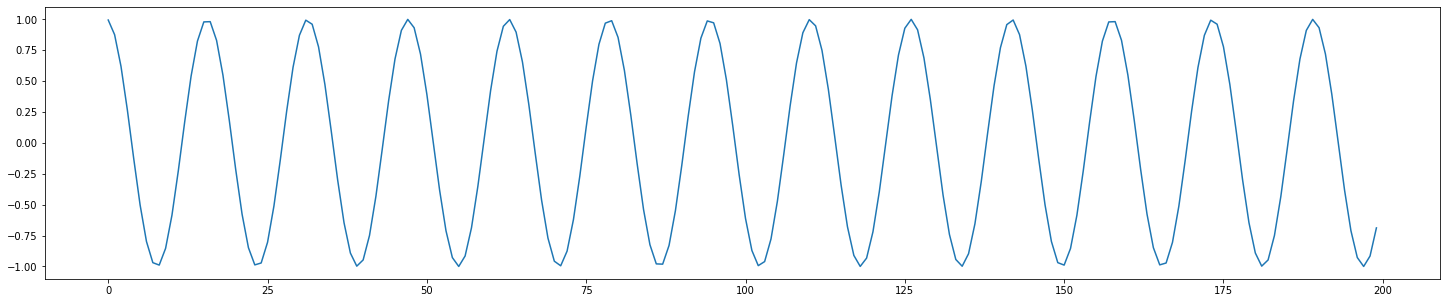

In [46]:
plt.figure(figsize=(25,5))
plt.plot(range(200),y)

In [47]:
inp_step = []
out_step = []
k = 4

for i in range(800-4):
    inp = x[i:i+k]
    out = x[i+k]
    inp_step.append(inp.tolist())
    out_step.append(out.tolist())
    


In [48]:
y.shape

(200,)

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Input, LSTM, GRU

x = np.array(inp_step).reshape((1,796,4))
y = np.array(out_step).reshape(1,796,1)



model = Sequential()
model.add(LSTM(units=100,input_shape=(1,4),activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='tanh'))

model.compile(optimizer='sgd',loss='MeanSquaredError')
model.build()
model.summary()


model.fit(x,y,batch_size=100,epochs=100,verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42000     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 43,021
Trainable params: 43,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5185
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5146
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5115
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5090
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - 

1/1 [==============================] - 0s 5ms/step - loss: 0.4997
Epoch 90/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4997
Epoch 91/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4997
Epoch 92/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4997
Epoch 93/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4997
Epoch 94/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4997
Epoch 95/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4997
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4997
Epoch 97/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4997
Epoch 98/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4997
Epoch 99/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4997
Epoch 100/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4997


In [50]:
x = seq[1:801]
y = seq[800:1000]

In [51]:
inp_step = []
out_step = []
k = 4

for i in range(0,200-4):
    inp = y[i:i+k]
    out = y[i+k]
    inp_step.append(inp.tolist())
    out_step.append(out.tolist())
    
    

In [52]:
preds = []
for i in inp_step:
    pred = model.predict([[i]])
    preds.append(pred.tolist()[0][0])

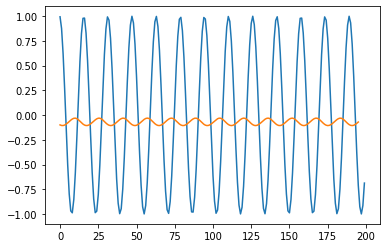

In [53]:
plt.plot(range(200),y)
plt.plot(range(196),preds)